In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

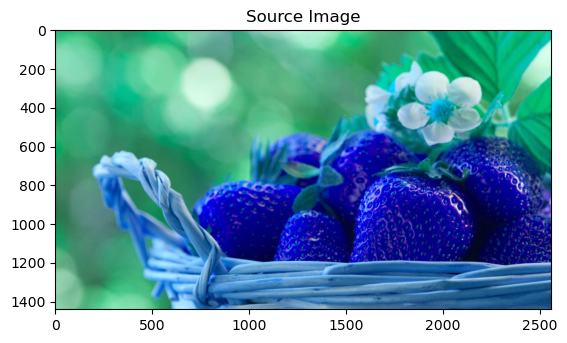

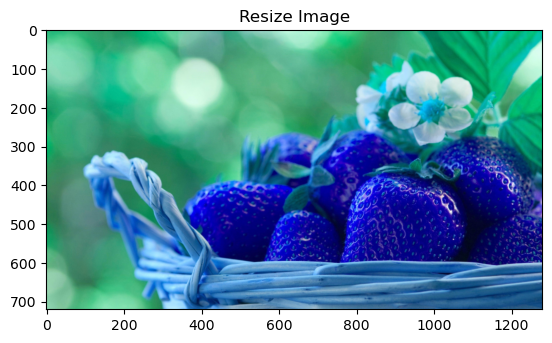

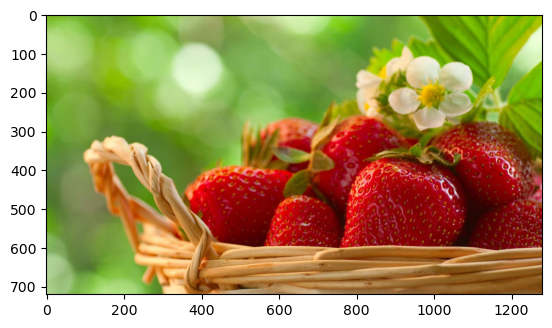

In [2]:
# Загрузка изображения
path = "E:\\Lab5Image.jpg"
image = cv2.imread(path)
plt.title('Source Image')
plt.imshow(image)
plt.show()
resize_img = cv2.resize(image,(1280,720))
plt.title('Resize Image')
plt.imshow(resize_img)
plt.show()
image_rgb = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

In [3]:
img_hsv = cv2.cvtColor(resize_img, cv2.COLOR_BGR2HSV)

h_channel = img_hsv[:,:,0]
v_channel = img_hsv[:,:,2]
bin_img = np.zeros(img_hsv.shape)
bin_img[(h_channel < 70) * (h_channel > 20) * (v_channel>100)] = [0, 0, 255]
cv2.imshow('h_channel', h_channel)
cv2.imshow('MyPhoto', bin_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

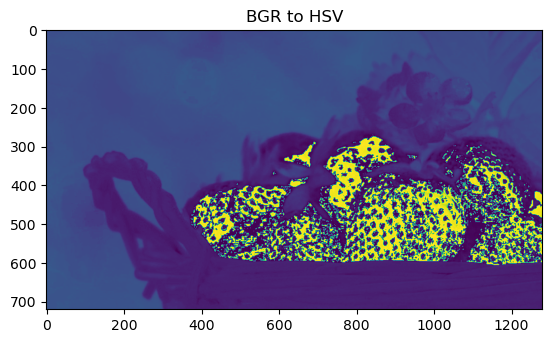

Количество обнаруженных ягод: 7


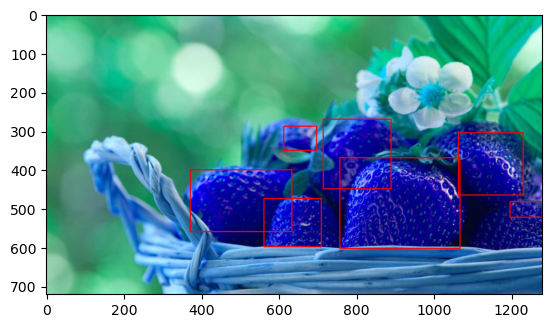

In [4]:
# Конвертация изображения из BGR в HSV
image_hsv = cv2.cvtColor(resize_img, cv2.COLOR_BGR2HSV)
plt.title('BGR to HSV')
plt.imshow(h_channel)
plt.show()
# cv2.imshow('Detected Objects', image_hsv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Определение диапазона цвета (например, для красного цвета)
# lower_red = np.array([0, 150, 100])
# upper_red = np.array([10, 255, 255])
# lower_red = np.array([0, 10, 150])
# upper_red = np.array([10, 255, 255])
red_lower = np.array([150, 50, 150], np.uint8)
red_upper = np.array([180, 255, 255], np.uint8)
red_mask = cv2.inRange(image_hsv, red_lower, red_upper)

# Создание маски для красного цвета
# mask = cv2.inRange(image_hsv, lower_red, upper_red)
# cv2.imshow('Detected Objects', mask)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

kernal = np.ones((5, 5), "uint8")
red_mask = cv2.dilate(red_mask, kernal)
res_red = cv2.bitwise_and(image_hsv, image_hsv, mask=red_mask)
cv2.imshow('Detected Objects', red_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow('Detected Objects', res_red)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Нахождение контуров объектов
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_clone = resize_img.copy()

# Отрисовка прямоугольников вокруг найденных контуров
strawberry_count = 0  # Переменная для хранения количества помидоров
# for contour in contours:
#     area = cv2.contourArea(contour)
#     if area > 2000:  # Фильтрация по площади, чтобы исключить мелкие шумы
#         x, y, w, h = cv2.boundingRect(contour)
#         cv2.rectangle(img_clone, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         strawberry_count += 1  # Увеличиваем счетчик каждый раз, когда обнаруживается помидор
    
# print("Количество обнаруженных ягод:", strawberry_count)
# plt.imshow(img_clone)
# plt.show()

for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if (area > 1350):
            x, y, w, h = cv2.boundingRect(contour)
            img_clone = cv2.rectangle(img_clone, (x, y), (x + w, y + h), (255, 0, 0), 2)
            strawberry_count += 1

print("Количество обнаруженных ягод:", strawberry_count)
plt.imshow(img_clone)
plt.show()
# # Отображение изображения с обозначенными объектами определенного цвета
# cv2.imshow('Detected Objects', img_clone)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
cv2.imwrite("DetectedImage.jpg", img_clone)

True